In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Team_Attributes.csv')
df.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [4]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()


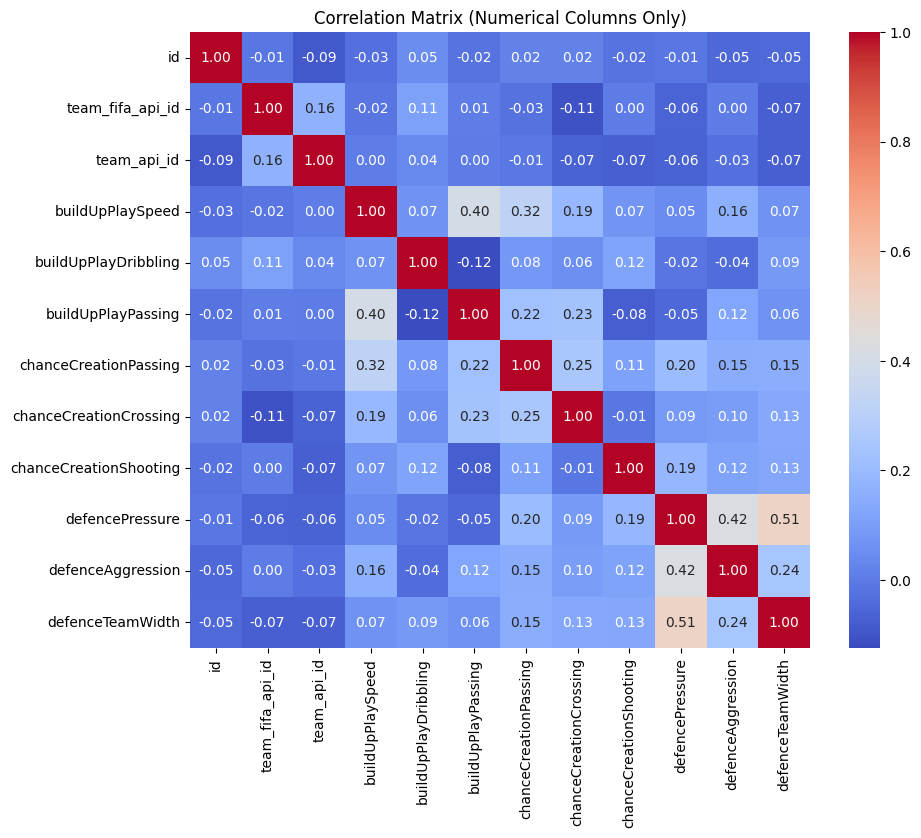

In [5]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()

In [6]:
features = ['buildUpPlaySpeed',
        'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
       'defenceAggression', 'defenceTeamWidth']

numerical_df = numerical_df[features]

numerical_df

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,60,50,60,65,55,50,55,45
1,52,56,54,63,64,47,44,54
2,47,54,54,63,64,47,44,54
3,70,70,70,70,70,60,70,70
4,47,52,53,48,52,47,47,52
...,...,...,...,...,...,...,...,...
1453,52,52,52,48,53,46,48,53
1454,54,51,47,52,50,44,55,53
1455,54,51,47,52,32,44,58,37
1456,54,51,47,52,32,44,58,37


In [7]:
pca = PCA(n_components=8)

principalComponents = pca.fit_transform(numerical_df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = [f'pc{i + 1}' for i in range(pca.n_components_)])
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-12.989681,-3.877936,-2.332153,-5.831230,1.400031,8.829990,4.982149,-4.593557
1,-7.516391,-1.724603,-1.415791,-9.887199,-6.955626,-7.874960,-0.353313,-2.927378
2,-4.222138,0.857039,-3.696173,-11.036263,-6.475901,-8.793971,1.567307,-2.481250
3,-48.430857,7.760416,2.585373,-1.036133,-7.919668,-4.861911,5.589255,4.712530
4,3.869779,0.443498,0.392451,3.790360,2.235839,-6.228472,2.956487,-1.850166
...,...,...,...,...,...,...,...,...
1453,1.367149,-0.790803,3.062924,4.303700,0.916150,-4.124215,0.377498,-0.436754
1454,0.226027,-1.520228,-0.421136,7.552654,-3.862073,2.902353,0.737471,2.900575
1455,6.161193,-12.727405,-7.311905,16.498551,3.643182,14.245900,8.154539,-4.886814
1456,6.161193,-12.727405,-7.311905,16.498551,3.643182,14.245900,8.154539,-4.886814


In [8]:
scree_plot_data = pd.DataFrame(data = pca.explained_variance_ratio_.reshape(1, -1), columns = [f'{i + 1}' for i in range(pca.n_components_)])
scree_plot_data

,1,2,3,4,5,6,7,8
0,0.275892,0.192864,0.124404,0.111903,0.090065,0.080618,0.077269,0.046986


In [82]:
components_df = pd.DataFrame(pca.components_, columns=[f'pc{i + 1}' for i in range(pca.n_components_)])
components_df.index = features
components_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
buildUpPlaySpeed,-0.501999,-0.392130,-0.415857,-0.375059,-0.135598,-0.306531,-0.304023,-0.275404
buildUpPlayPassing,-0.344006,-0.430806,-0.034294,-0.162346,0.321112,0.564941,0.299844,0.395419
chanceCreationPassing,0.451346,0.011826,0.062872,-0.682336,0.536175,-0.099772,0.011108,-0.170441
chanceCreationCrossing,0.093325,0.341218,-0.305353,-0.492185,-0.593612,0.187640,0.348563,0.174051
chanceCreationShooting,0.039452,-0.338492,0.747571,-0.273175,-0.441176,0.104414,-0.211395,-0.012392
defencePressure,0.409474,-0.564179,-0.177848,0.212712,-0.181224,0.006943,0.481938,-0.414731
defenceAggression,-0.497636,0.283779,0.351195,-0.066060,0.105650,-0.094783,0.540947,-0.480996
defenceTeamWidth,-0.019181,-0.175113,0.121915,-0.030193,0.001047,-0.722345,0.355625,0.552214
